# 지역별 매출 변화 분석

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
import os
os.name

if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')

In [3]:
# Load Data

differentFile = "/Users/ChaeEun/Desktop/프로젝트/DifferentCity.csv"

sameFile = "/Users/ChaeEun/Desktop/프로젝트/SameCity.csv"

allFile = "/Users/ChaeEun/Desktop/프로젝트/bcdata.csv"

In [4]:
# Read Data

different = pd.read_csv(differentFile)

same = pd.read_csv(sameFile)

allarea = pd.read_csv(allFile)

## 이용금액 합

In [21]:
# 전국 카드 사용 월별 그룹화

allDate = allarea.groupby(by = ["REG_YYMM"])

# 전국 월별 이용금액 합

allDateAMT = allDate['AMT'].sum()

In [30]:
# 전국 카드 사용 지역과 월별 그룹화

allAreaDate = allarea.groupby(by = ["CARD_SIDO_NM", "REG_YYMM"])

# 전국 지역과 월별 이용금액 합

allAreaDateAMT = allAreaDate['AMT'].sum()

In [23]:
# 타지역 카드 사용 지역과 월별 그룹화

differentDate = different.groupby(by = ["CARD_SIDO_NM", "REG_YYMM"])

# 타지역 지역과 월별 이용금액 합

differentDateAMT = differentDate['AMT'].sum()

In [24]:
# 같은지역 카드 사용 지역과 월별 그룹화

sameDate = same.groupby(by = ["CARD_SIDO_NM", "REG_YYMM"])

# 같은지역 지역과 월별 이용금액 합

sameDateAMT = sameDate['AMT'].sum()

## 전국 월별 매출 변화

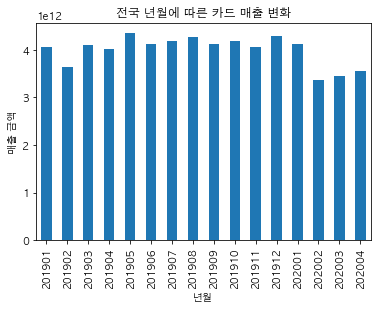

In [25]:
# 월별 이용금액 시각화

allDateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('매출 금액')
plt.title('전국 년월에 따른 카드 매출 변화')

plt.show()


In [48]:
# 전국 코로나 전후 카드 매출 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 매출 데이터 추출
allDateAMT2019 = allDateAMT.loc['201901': '201904']
allDateAMT2020 = allDateAMT.loc['202001': '202004']

# 2019년 2월~4월, 2020년 2월~4월 카드매출 데이터 추출
allDateAMT2019_2 = allDateAMT.loc['201902': '201904']
allDateAMT2020_2 = allDateAMT.loc['202002': '202004']

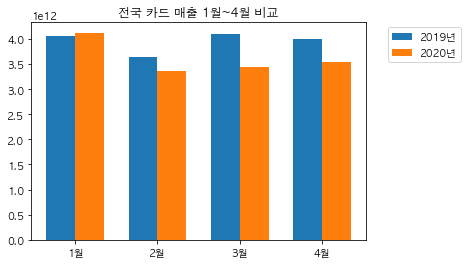

2019년 1월~4월과 2020년 1월~4월 전국 카드매출 t-statistics 값은 1.630 이며, p-value는 0.154 입니다.
2019년 2월~4월과 2020년 2월~4월 전국 카드매출 t-statistics 값은 3.062 이며, p-value는 0.038 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 11.88%가 하락하였습니다.


In [57]:
# 2019년 1월~4월, 2020년 1월~4월 전국 카드 매출 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)
width = 0.35
p1 = ax.bar(ind, allDateAMT2019, width)

p2 = ax.bar(ind+width, allDateAMT2020, width)

ax.set_title('전국 카드 매출 1월~4월 비교')
ax.set_xticks(ind+width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019년', '2020년'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 카드매출 T-test
allDateAMTttest = stats.ttest_ind(allDateAMT2019.values, allDateAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 전국 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %allDateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 카드대출 T-test
allDateAMTttest_2 = stats.ttest_ind(allDateAMT2019_2.values, allDateAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 전국 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %allDateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(allDateAMT2019_2.values)
AMT2020sum = sum(allDateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)

## 강원

In [31]:
# 강원 이용금액

DateAMT = allAreaDateAMT['강원']

# 타지역 이용금액

DifferentAMT = differentDateAMT['강원']

# 같은지역 이용금액

SameAMT = sameDateAMT['강원']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT

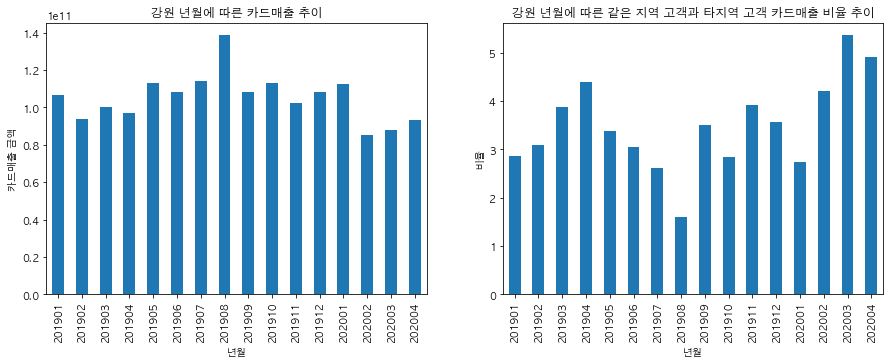

In [33]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('강원 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('강원 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()

In [58]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']

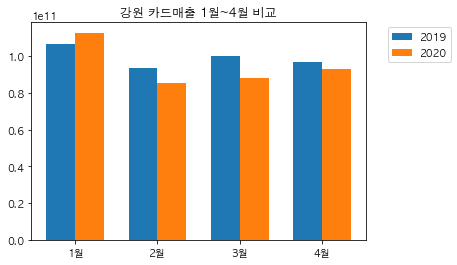

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 0.666 이며, p-value는 0.530 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 2.704 이며, p-value는 0.054 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 8.34%가 하락하였습니다.


In [59]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('강원 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)

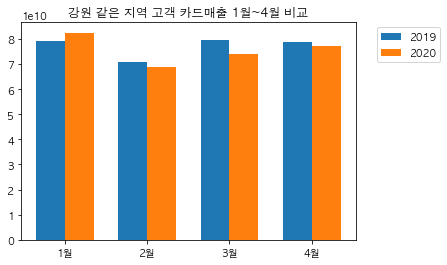

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.368 이며, p-value는 0.726 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.768 이며, p-value는 0.485 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 3.82%가 하락하였습니다.


In [60]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('강원 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)

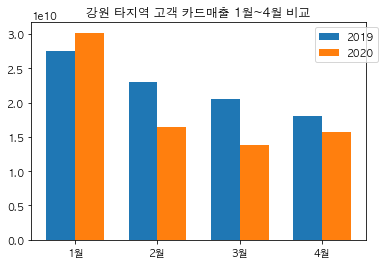

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 0.752 이며, p-value는 0.481 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 3.181 이며, p-value는 0.033 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 25.19%가 하락하였습니다.


In [61]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('강원 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)

## 경기

In [62]:
# 경기 이용금액

DateAMT = allAreaDateAMT['경기']

# 타지역 이용금액

DifferentAMT = differentDateAMT['경기']

# 같은지역 이용금액

SameAMT = sameDateAMT['경기']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT


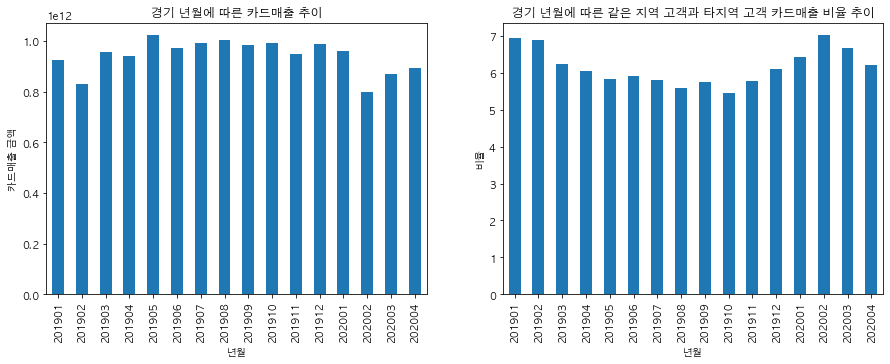

In [63]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('경기 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('경기 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [64]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']

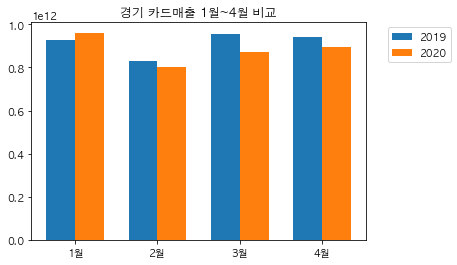

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 0.745 이며, p-value는 0.485 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 1.131 이며, p-value는 0.321 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 6.01%가 하락하였습니다.


In [65]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('경기 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


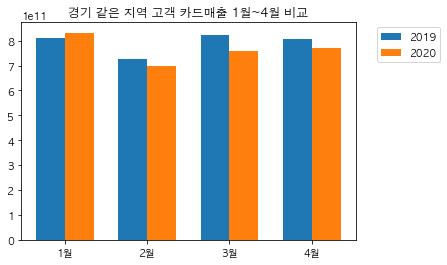

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.774 이며, p-value는 0.468 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 1.170 이며, p-value는 0.307 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 5.52%가 하락하였습니다.


In [66]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('경기 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


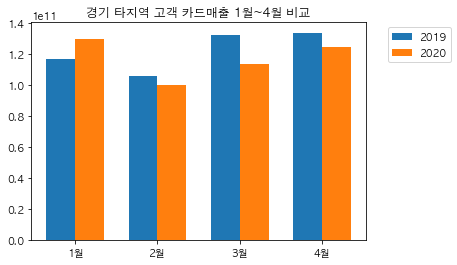

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 0.571 이며, p-value는 0.589 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 0.981 이며, p-value는 0.382 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 9.09%가 하락하였습니다.


In [67]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('경기 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 경남

In [68]:
# 경남 이용금액

DateAMT = allAreaDateAMT['경남']

# 타지역 이용금액

DifferentAMT = differentDateAMT['경남']

# 같은지역 이용금액

SameAMT = sameDateAMT['경남']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT

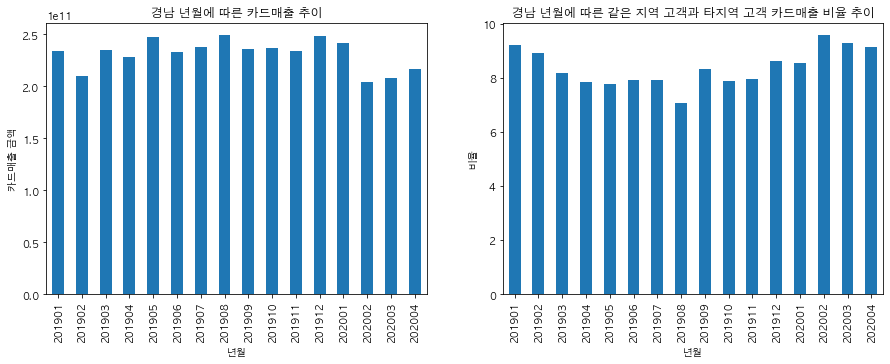

In [69]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('경남 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('경남 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [70]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


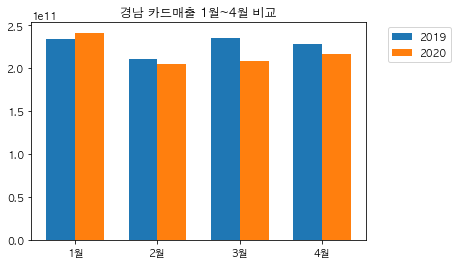

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 0.914 이며, p-value는 0.396 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 1.778 이며, p-value는 0.150 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 6.54%가 하락하였습니다.


In [71]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('경남 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


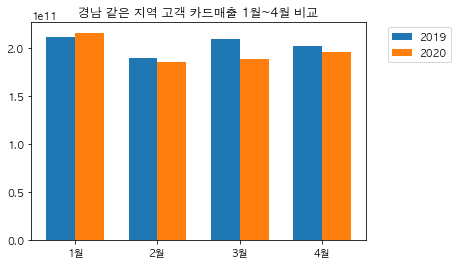

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.802 이며, p-value는 0.453 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 1.603 이며, p-value는 0.184 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 5.39%가 하락하였습니다.


In [72]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('경남 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


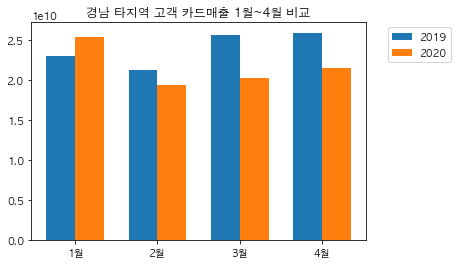

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 1.346 이며, p-value는 0.227 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 2.408 이며, p-value는 0.074 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 16.07%가 하락하였습니다.


In [73]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('경남 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 경북 

In [74]:
# 경북 이용금액

DateAMT = allAreaDateAMT['경북']

# 타지역 이용금액

DifferentAMT = differentDateAMT['경북']

# 같은지역 이용금액

SameAMT = sameDateAMT['경북']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT

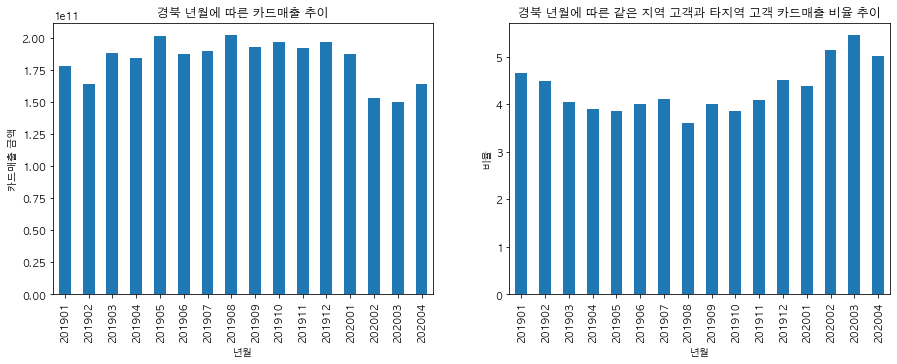

In [75]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('경북 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('경북 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [76]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


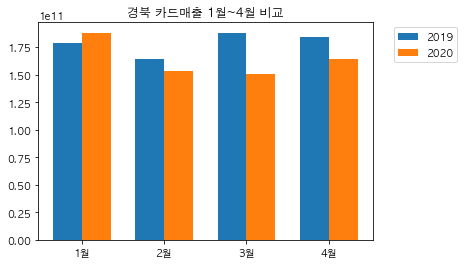

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.509 이며, p-value는 0.182 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 2.735 이며, p-value는 0.052 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 12.94%가 하락하였습니다.


In [77]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('경북 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


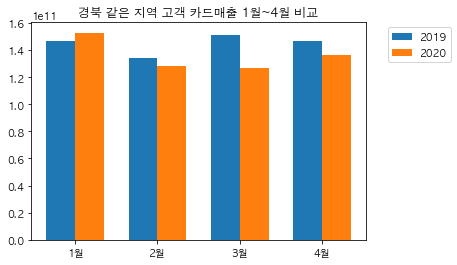

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 1.233 이며, p-value는 0.264 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 2.308 이며, p-value는 0.082 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 9.30%가 하락하였습니다.


In [78]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('경북 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


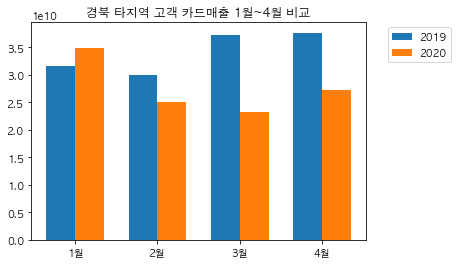

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 2.013 이며, p-value는 0.091 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 3.542 이며, p-value는 0.024 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 27.96%가 하락하였습니다.


In [79]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('경북 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 광주

In [80]:
# 광주 이용금액

DateAMT = allAreaDateAMT['광주']

# 타지역 이용금액

DifferentAMT = differentDateAMT['광주']

# 같은지역 이용금액

SameAMT = sameDateAMT['광주']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT

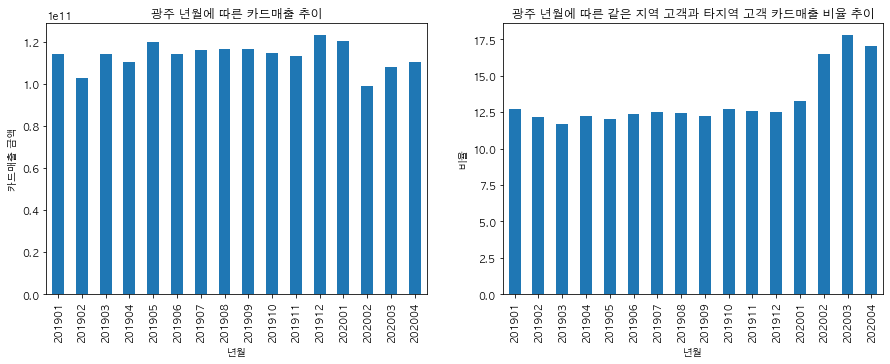

In [81]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('광주 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('광주 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [82]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


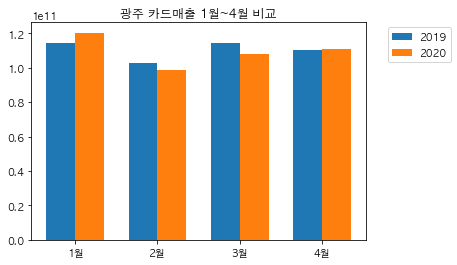

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 0.193 이며, p-value는 0.853 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 0.666 이며, p-value는 0.542 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 3.02%가 하락하였습니다.


In [83]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('광주 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


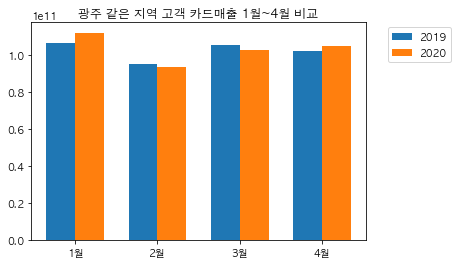

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 -0.192 이며, p-value는 0.854 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.163 이며, p-value는 0.878 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 0.75%가 하락하였습니다.


In [84]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('광주 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


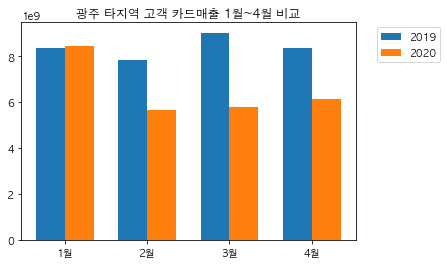

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 2.682 이며, p-value는 0.036 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 6.694 이며, p-value는 0.003 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 30.28%가 하락하였습니다.


In [85]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('광주 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 대구

In [86]:
# 대구 이용금액

DateAMT = allAreaDateAMT['대구']

# 타지역 이용금액

DifferentAMT = differentDateAMT['대구']

# 같은지역 이용금액

SameAMT = sameDateAMT['대구']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT


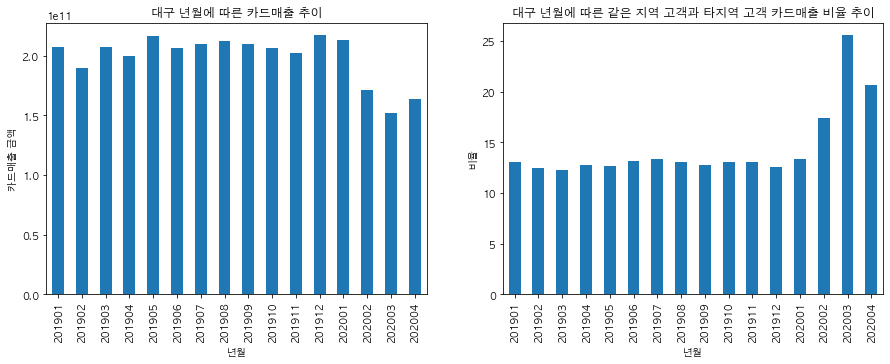

In [87]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('대구 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('대구 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [88]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


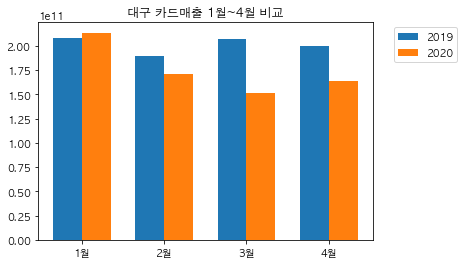

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.837 이며, p-value는 0.116 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 4.783 이며, p-value는 0.009 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 18.36%가 하락하였습니다.


In [89]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('대구 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


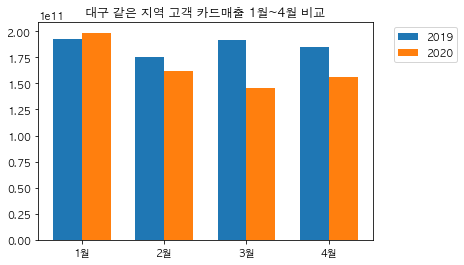

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 1.690 이며, p-value는 0.142 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 4.437 이며, p-value는 0.011 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 15.91%가 하락하였습니다.


In [90]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('대구 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


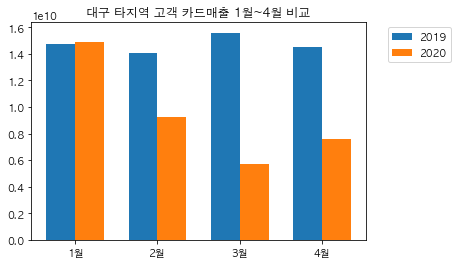

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 2.678 이며, p-value는 0.037 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 6.420 이며, p-value는 0.003 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 48.94%가 하락하였습니다.


In [91]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('대구 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 대전

In [92]:
# 대전 이용금액

DateAMT = allAreaDateAMT['대전']

# 타지역 이용금액

DifferentAMT = differentDateAMT['대전']

# 같은지역 이용금액

SameAMT = sameDateAMT['대전']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT


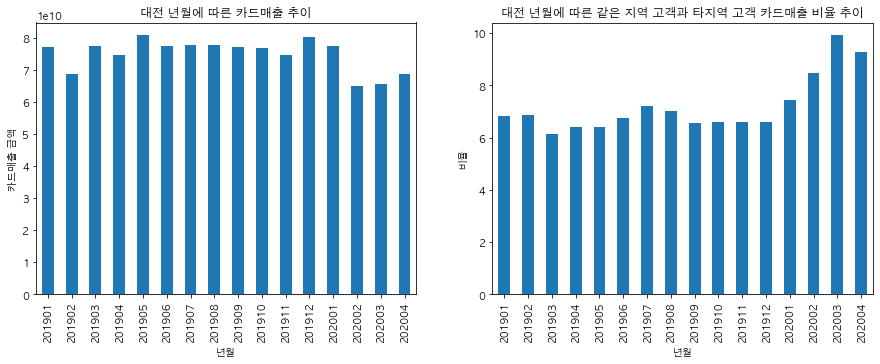

In [93]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('대전 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('대전 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [94]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


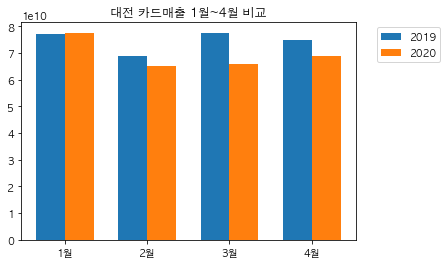

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.524 이며, p-value는 0.178 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 2.515 이며, p-value는 0.066 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 9.72%가 하락하였습니다.


In [95]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('대전 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


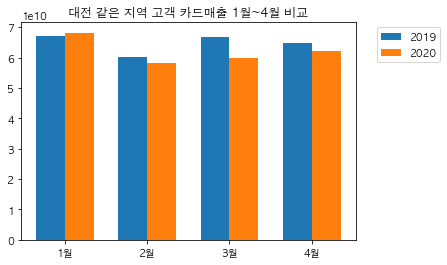

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.947 이며, p-value는 0.380 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 1.653 이며, p-value는 0.174 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 5.95%가 하락하였습니다.


In [96]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('대전 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


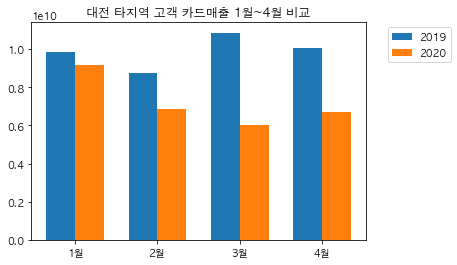

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 3.317 이며, p-value는 0.016 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 5.050 이며, p-value는 0.007 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 34.03%가 하락하였습니다.


In [97]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('대전 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 부산

In [98]:
# 부산 이용금액

DateAMT = allAreaDateAMT['부산']

# 타지역 이용금액

DifferentAMT = differentDateAMT['부산']

# 같은지역 이용금액

SameAMT = sameDateAMT['부산']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT


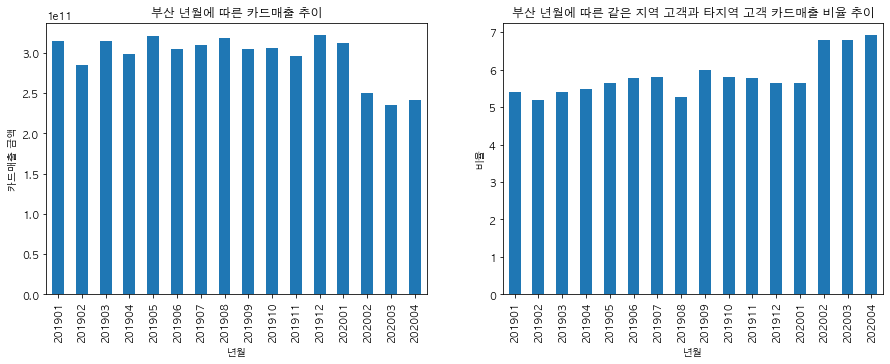

In [99]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('부산 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('부산 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [100]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


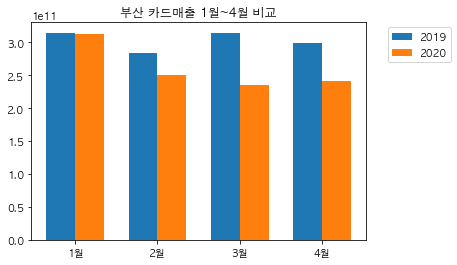

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.254 이며, p-value는 0.065 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 5.846 이며, p-value는 0.004 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 19.05%가 하락하였습니다.


In [101]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('부산 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


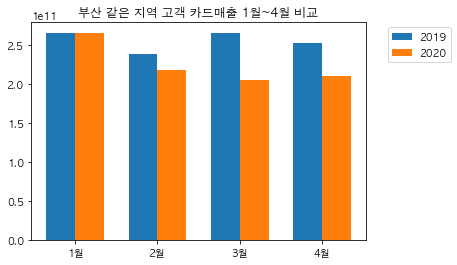

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 2.024 이며, p-value는 0.089 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 4.705 이며, p-value는 0.009 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 16.21%가 하락하였습니다.


In [102]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('부산 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


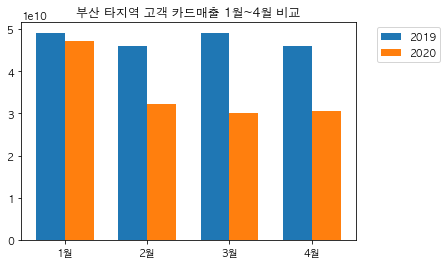

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 3.028 이며, p-value는 0.023 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 13.436 이며, p-value는 0.000 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 34.26%가 하락하였습니다.


In [103]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('부산 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 서울

In [104]:
# 서울 이용금액

DateAMT = allAreaDateAMT['서울']

# 타지역 이용금액

DifferentAMT = differentDateAMT['서울']

# 같은지역 이용금액

SameAMT = sameDateAMT['서울']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT


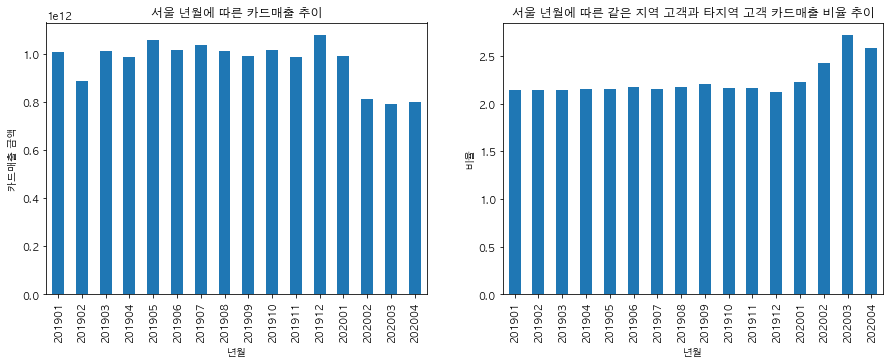

In [105]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('서울 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('서울 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [106]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


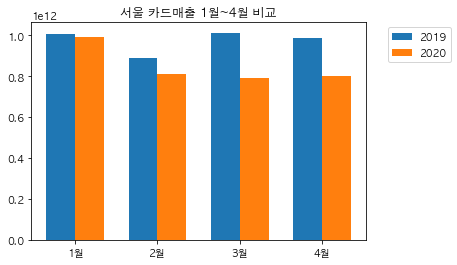

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.230 이며, p-value는 0.067 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 4.185 이며, p-value는 0.014 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 16.82%가 하락하였습니다.


In [107]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('서울 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


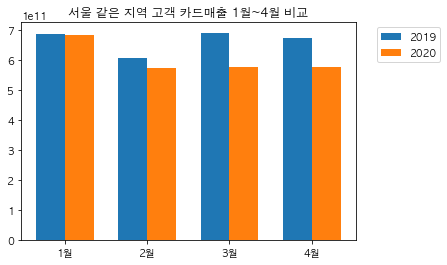

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 1.805 이며, p-value는 0.121 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 3.053 이며, p-value는 0.038 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 12.23%가 하락하였습니다.


In [108]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('서울 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


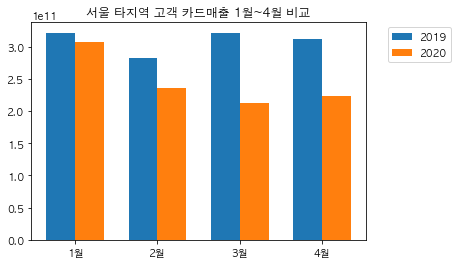

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 2.782 이며, p-value는 0.032 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 5.905 이며, p-value는 0.004 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 26.65%가 하락하였습니다.


In [109]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('서울 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 세종

In [110]:
# 세종 이용금액

DateAMT = allAreaDateAMT['세종']

# 타지역 이용금액

DifferentAMT = differentDateAMT['세종']

# 같은지역 이용금액

SameAMT = sameDateAMT['세종']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT


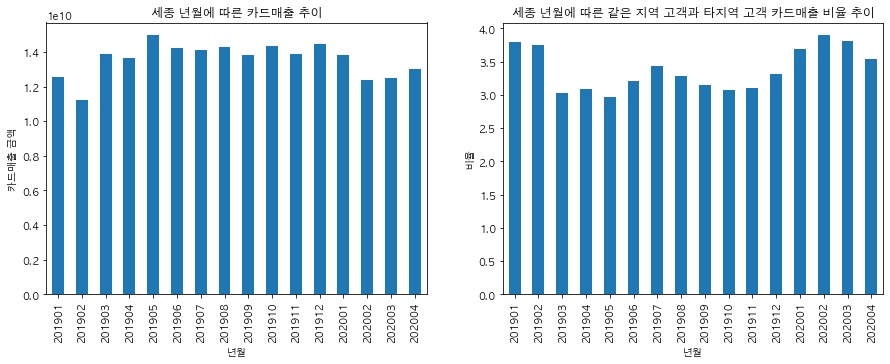

In [111]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('세종 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('세종 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [112]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


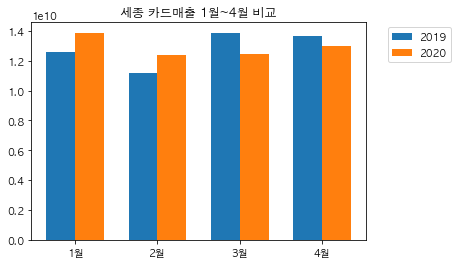

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 -0.146 이며, p-value는 0.889 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 0.333 이며, p-value는 0.756 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 2.27%가 하락하였습니다.


In [113]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('세종 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


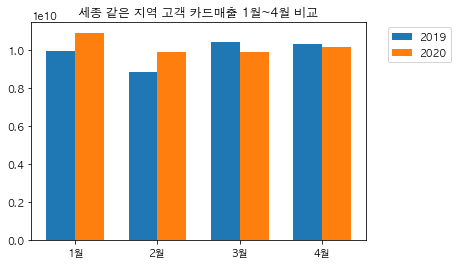

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 -0.708 이며, p-value는 0.505 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 -0.180 이며, p-value는 0.866 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 -0.95%가 하락하였습니다.


In [114]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('세종 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


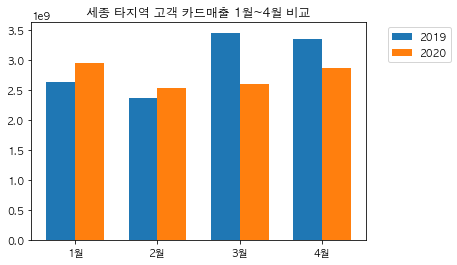

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 0.724 이며, p-value는 0.496 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 1.068 이며, p-value는 0.346 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 12.68%가 하락하였습니다.


In [115]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('세종 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 울산

In [116]:
# 울산 이용금액

DateAMT = allAreaDateAMT['울산']

# 타지역 이용금액

DifferentAMT = differentDateAMT['울산']

# 같은지역 이용금액

SameAMT = sameDateAMT['울산']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT


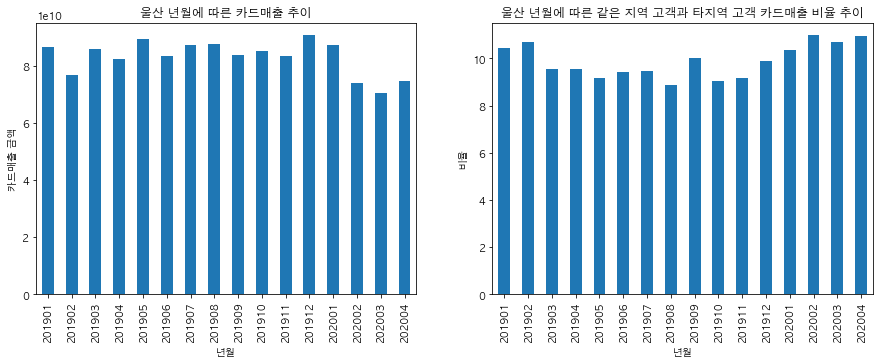

In [117]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('울산 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('울산 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [118]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


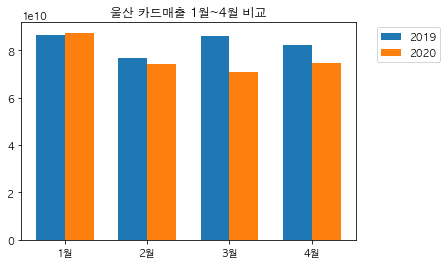

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.441 이며, p-value는 0.200 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 2.851 이며, p-value는 0.046 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 10.49%가 하락하였습니다.


In [119]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('울산 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


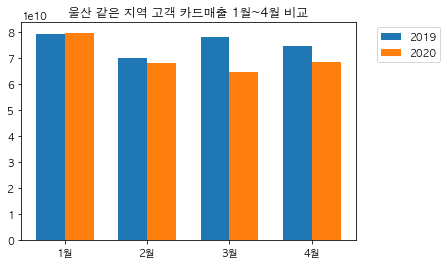

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 1.363 이며, p-value는 0.222 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 2.829 이며, p-value는 0.047 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 9.73%가 하락하였습니다.


In [120]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('울산 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


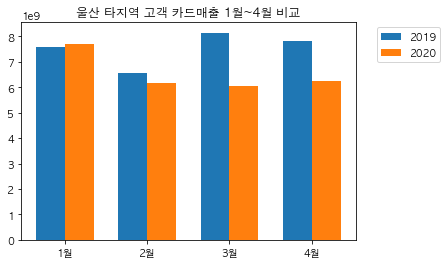

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 1.897 이며, p-value는 0.107 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 2.743 이며, p-value는 0.052 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 17.95%가 하락하였습니다.


In [121]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('울산 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 인천

In [122]:
# 인천 이용금액

DateAMT = allAreaDateAMT['인천']

# 타지역 이용금액

DifferentAMT = differentDateAMT['인천']

# 같은지역 이용금액

SameAMT = sameDateAMT['인천']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT


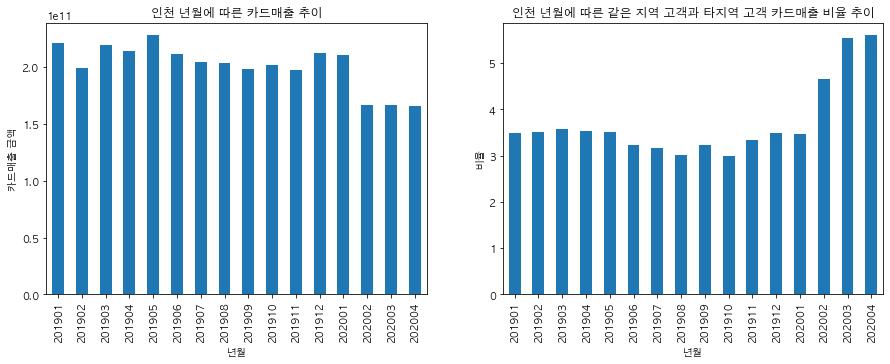

In [123]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('인천 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('인천 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [124]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


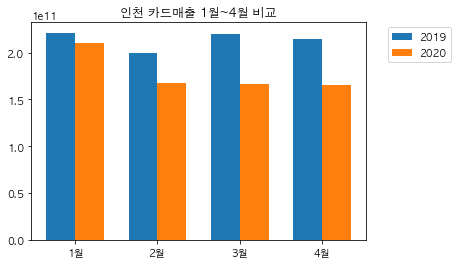

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 2.997 이며, p-value는 0.024 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 7.212 이며, p-value는 0.002 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 21.10%가 하락하였습니다.


In [125]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('인천 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


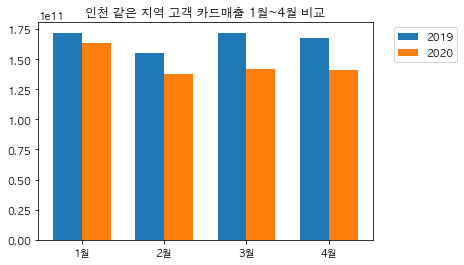

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 2.906 이며, p-value는 0.027 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 4.823 이며, p-value는 0.009 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 15.01%가 하락하였습니다.


In [126]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('인천 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


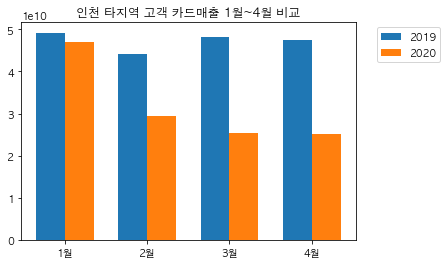

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 2.906 이며, p-value는 0.027 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 10.757 이며, p-value는 0.000 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 42.64%가 하락하였습니다.


In [127]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('인천 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 전남

In [128]:
# 전남 이용금액

DateAMT = allAreaDateAMT['전남']

# 타지역 이용금액

DifferentAMT = differentDateAMT['전남']

# 같은지역 이용금액

SameAMT = sameDateAMT['전남']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT


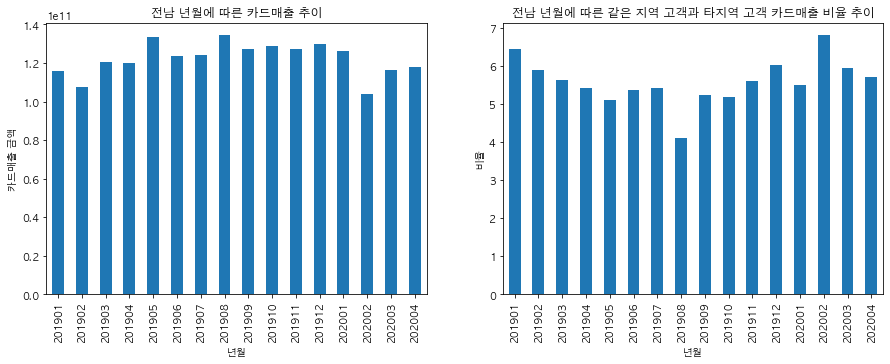

In [129]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('전남 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('전남 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [130]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


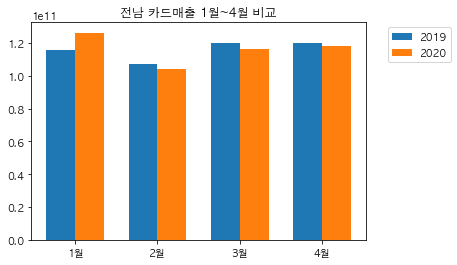

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 -0.073 이며, p-value는 0.944 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 0.486 이며, p-value는 0.652 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 2.58%가 하락하였습니다.


In [131]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('전남 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


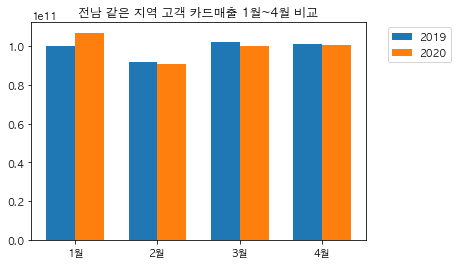

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 -0.148 이며, p-value는 0.887 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.308 이며, p-value는 0.773 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 1.44%가 하락하였습니다.


In [132]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('전남 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


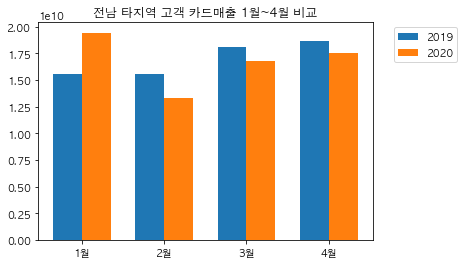

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 0.137 이며, p-value는 0.896 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 0.981 이며, p-value는 0.382 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 9.05%가 하락하였습니다.


In [133]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('전남 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 전북

In [134]:
# 전북 이용금액

DateAMT = allAreaDateAMT['전북']

# 타지역 이용금액

DifferentAMT = differentDateAMT['전북']

# 같은지역 이용금액

SameAMT = sameDateAMT['전북']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT


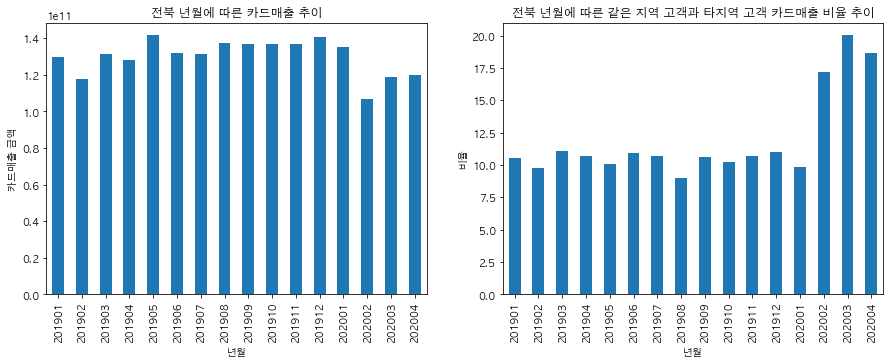

In [135]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('전북 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('전북 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [136]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


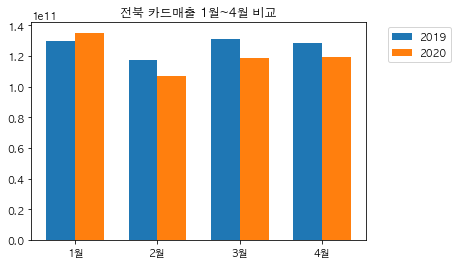

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 0.988 이며, p-value는 0.361 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 1.785 이며, p-value는 0.149 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 8.41%가 하락하였습니다.


In [137]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('전북 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


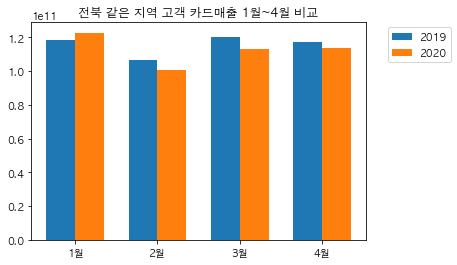

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.561 이며, p-value는 0.595 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.935 이며, p-value는 0.403 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 4.82%가 하락하였습니다.


In [138]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('전북 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


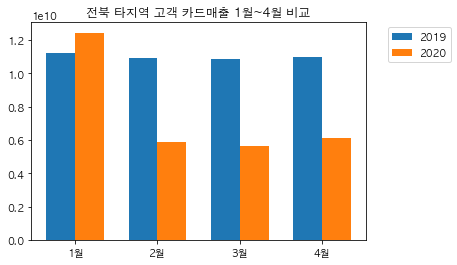

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 2.111 이며, p-value는 0.079 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 38.903 이며, p-value는 0.000 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 46.18%가 하락하였습니다.


In [139]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('전북 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 제주

In [140]:
# 제주 이용금액

DateAMT = allAreaDateAMT['제주']

# 타지역 이용금액

DifferentAMT = differentDateAMT['제주']

# 같은지역 이용금액

SameAMT = sameDateAMT['제주']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT


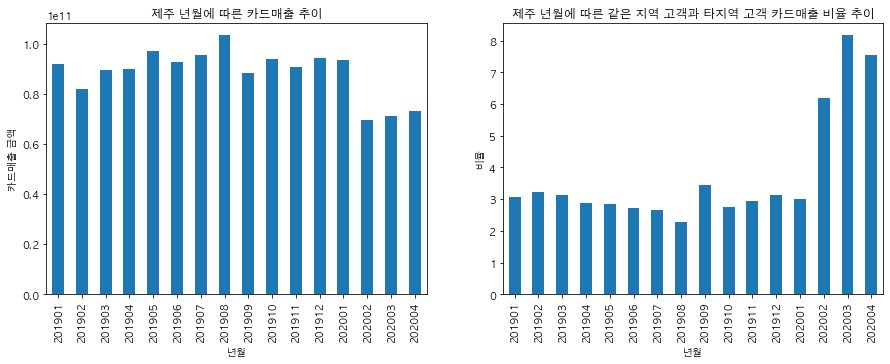

In [141]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('제주 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('제주 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [142]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


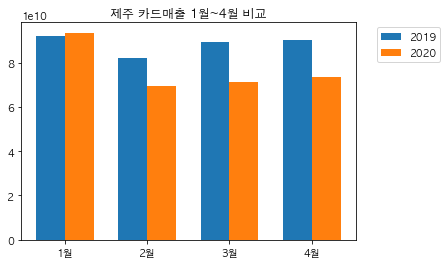

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 1.912 이며, p-value는 0.104 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 5.612 이며, p-value는 0.005 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 18.16%가 하락하였습니다.


In [143]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('제주 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


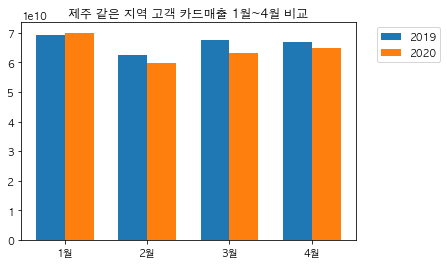

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.829 이며, p-value는 0.439 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 1.435 이며, p-value는 0.225 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 4.70%가 하락하였습니다.


In [144]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('제주 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


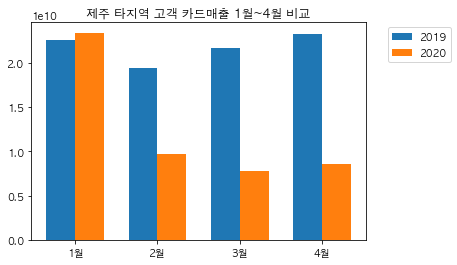

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 2.461 이며, p-value는 0.049 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 10.244 이며, p-value는 0.001 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 59.51%가 하락하였습니다.


In [145]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('제주 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 충남

In [146]:
# 충남 이용금액

DateAMT = allAreaDateAMT['충남']

# 타지역 이용금액

DifferentAMT = differentDateAMT['충남']

# 같은지역 이용금액

SameAMT = sameDateAMT['충남']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT


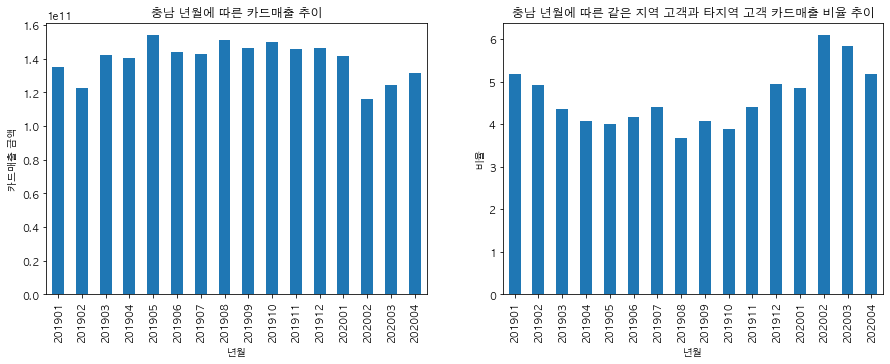

In [147]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('충남 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('충남 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [148]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


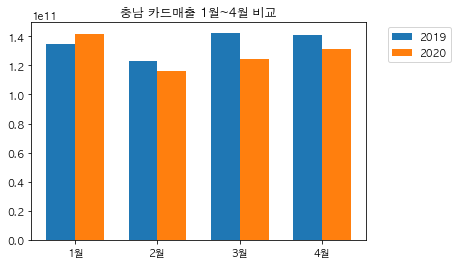

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 0.969 이며, p-value는 0.370 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 1.458 이며, p-value는 0.219 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 8.29%가 하락하였습니다.


In [149]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('충남 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


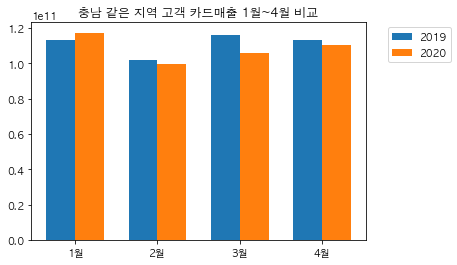

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.539 이며, p-value는 0.609 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.934 이며, p-value는 0.403 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 4.40%가 하락하였습니다.


In [150]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('충남 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


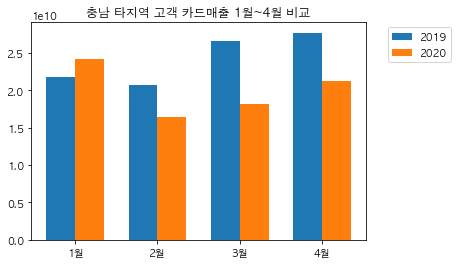

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 1.723 이며, p-value는 0.136 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 2.456 이며, p-value는 0.070 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 25.46%가 하락하였습니다.


In [151]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('충남 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


## 충북

In [152]:
# 충북 이용금액

DateAMT = allAreaDateAMT['충북']

# 타지역 이용금액

DifferentAMT = differentDateAMT['충북']

# 같은지역 이용금액

SameAMT = sameDateAMT['충북']

# 타지역과 같은지역 고객 이용금액 비율

AMTratio = SameAMT/DifferentAMT


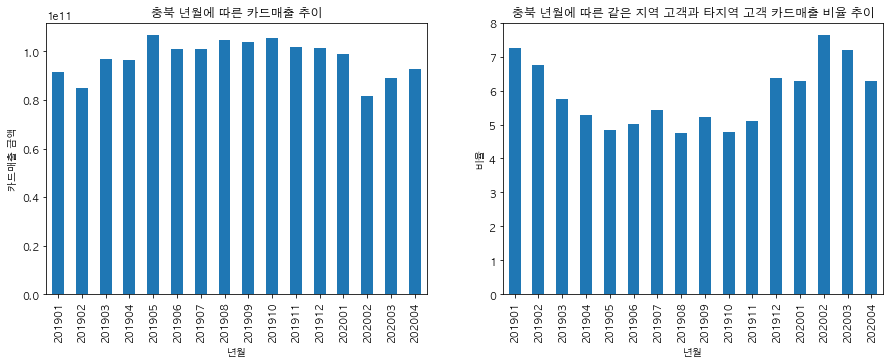

In [153]:
# 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

DateAMT.plot.bar()
plt.xlabel('년월')
plt.ylabel('카드매출 금액')
plt.title('충북 년월에 따른 카드매출 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('충북 년월에 따른 같은 지역 고객과 타지역 고객 카드매출 비율 추이')

plt.show()


In [154]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
DateAMT2019 = DateAMT.loc['201901': '201904']
DateAMT2020 = DateAMT.loc['202001': '202004']

SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

DateAMT2019_2 = DateAMT.loc['201902': '201904']
DateAMT2020_2 = DateAMT.loc['202002': '202004']

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentAMT.loc['202002':'202004']


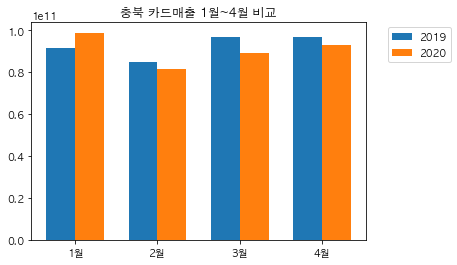

2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 0.394 이며, p-value는 0.707 입니다.
2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 0.931 이며, p-value는 0.405 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 5.21%가 하락하였습니다.


In [155]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DateAMT2019, width)

p2 = ax.bar(ind + width, DateAMT2020, width)

ax.set_title('충북 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1월~4월, 2020년 1월~4월 이용금액 T-test
DateAMTttest = stats.ttest_ind(DateAMT2019.values, DateAMT2020.values)

print("2019년 1월~4월과 2020년 1월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest)

# 2019년 2월~4월, 2020년 2월~4월 이용금액 T-test
DateAMTttest_2 = stats.ttest_ind(DateAMT2019_2.values, DateAMT2020_2.values)

print("2019년 2월~4월과 2020년 2월~4월 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DateAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DateAMT2019_2.values)
AMT2020sum = sum(DateAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


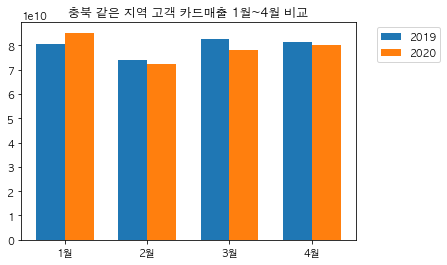

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.163 이며, p-value는 0.876 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 0.636 이며, p-value는 0.559 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 2.92%가 하락하였습니다.


In [156]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('충북 같은 지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(SameAMT2019_2.values)
AMT2020sum = sum(SameAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)


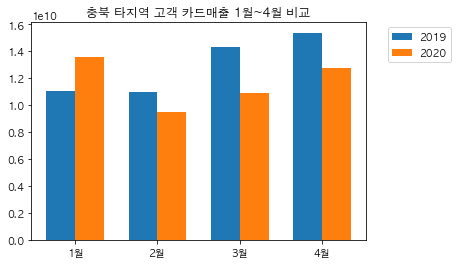

2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 0.864 이며, p-value는 0.421 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 1.540 이며, p-value는 0.198 입니다.
2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 18.61%가 하락하였습니다.


In [157]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('충북 타지역 고객 카드매출 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 카드매출 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

# 매출 하락 %

AMT2019sum = sum(DifferentAMT2019_2.values)
AMT2020sum = sum(DifferentAMT2020_2.values)

AMTpercentage = (AMT2019sum - AMT2020sum) / AMT2019sum * 100
print("2019년 2월~4월에 비해 2020년 2월~4월 카드매출은 %.2f%%가 하락하였습니다." %AMTpercentage)
